written by Charlie Moffett, CUSP 2017

__Assignment 1: Test the Z test__

In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import scipy.stats
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
# Generate parameter distribution
np.random.seed(999)

# first let's make an x-axis
# we can do it at regular intervals
x = np.random.normal(10,100,50) # 50 points between 10 and 100

array([  22.7157844 ,  150.18908825,   41.48149867,  -75.84491643,
        -16.61344368,  -54.89007096,  166.62675689, -199.13701906,
        155.63280637,  104.52934154,  -30.02011939,   41.5227304 ,
       -101.00608341,  -48.48215253,   -8.84095641,   91.30236491,
         -6.13047164,  170.08715507,  108.43425751,  -73.54473728,
         -8.66493399,  -75.80670736,  -65.9778159 , -141.20542395,
        184.77747441,  223.00549769,   17.11542235, -174.16422418,
        -25.25906976,  -30.89037948,   65.93101709,   57.40130974,
       -160.26333684, -120.82865468,   52.48317379,   10.66686835,
        -37.0683277 ,   58.05221618,  116.61863028,  125.63184132,
          9.75902483,   16.92448453,   94.70240676,   76.1684352 ,
        -60.82337603,  -39.86054355,   70.48757253,   40.05431318,
        -15.12286687,   65.61100805])

Text(0,-2,'The distribution is Gaussian, with a mean of 144 and a standard deviation of 12')

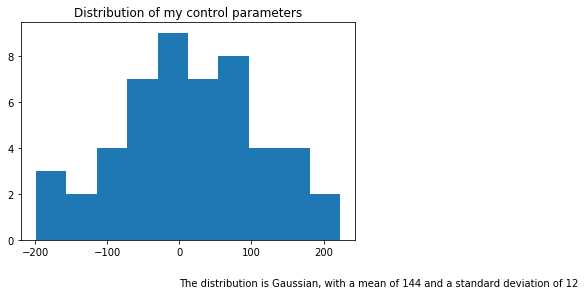

In [31]:
# plotting histogram of my normal distribution
plt.hist(x)
pl.title('Distribution of my control parameters')
pl.text(x=0, y=-2, s='The distribution is Gaussian, with a mean of 144 and a standard deviation of 12')

In [17]:
pl.text?

In [1]:
# Generate N samples from a distribution of your choice, but not a Gaussian
np.random.seed(999)

mean = 144
sigma = 12
N = 100

# with a chosen mean μ and standard deviation σ: N(μ, σ) and 
# calculate the mean of each sample (all samples should have the same size n)

In [ ]:
# Assess the validity of the Z-test
# Show that the distribution of z -statistics is consistent with N(0,1)